## Class 1 - Formulating a modeling problem
In our first lecture, we discussed a few overarching points related to this course. Let's do a quick recap:
- The core of this course will be devoted to exploring ways in which we can extract knowledge from data;
- This relies on the fact that we need to be able to "ask questions" to our data;
- Most of these questions will revolve around learning a mathematical or algorithmic model of relations between some features and an outcome, or, when no outcome is available, learning "structures" within our feature space;
- We can do so for two (not mutually exclusive) reasons: to be able to infer the outcome from the features we can observe or to understand how and why inputs and outcomes are related;
- Here, we will mostly focus on developing models which are **good at inferring outcomes from features** in new data.


We emphasized that an important skill for a data scientist is that of being able to identify **questions** that can be answered with data. Let's start getting our hands dirty with this in this first class. Today, the focus will be formulating an interesting predictive questions based on a dataset of your own choice.

### Structure of today's exercise
For this class, your goal is to perform the following tasks:
1. Together with your group, choose one of these datasets (or find a new one)
    - HippoCorpus (a dataset of recalled or imagined stories, paired with a number of story- and participant-related metadata: https://www.kaggle.com/datasets/saurabhshahane/hippocorpus)
    - EEG Psychiatric Disorders Dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset?resource=download (from this paper: https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.707581/full)
    - Personalities and random number choices from OpenPsychometrics: https://openpsychometrics.org/_rawdata/ (search for "random numbers")
    - A large-scale data set containing data from a bike-sharing service and weather information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset.

2. Load the corresponding data, which you will find under `Project Files/data` using `pandas`

3. Using `pandas` and `seaborn`, get a grasp of the overall characteristics of the dataset:
    - What is the size of your dataset, and how many features are available? 
        - Hint: Use `DataFrame.shape` from `pandas`
    - What kind of information do the columns include?
        - Hint: Read the dataset's documentation + associated papers. Methods like `.info()` or `.describe()` could also be useful.
    - What *types* of variables does each of the column contain? What kind of values do we expect to find in each column?
        - Hint: to extract this information analytically, look into `pandas` `dtype`, `unique`, and `min`/`max` functions
        - To plot this information, use `seaborn` functions (`displot`, `pointplot`, `catplot` or `boxplot` could be helpful)
    - What is the proportion of missing values for each column? Is there any column with a worryingly high proportion of missing values?
        - Hint: use the `.isnull()` method and aggregate over rows using `.sum()`
    - What is the proportion of missing values for each row? Is there any row with a worryingly high proportion of missing values?
        - Hint: very similar to what you did above
    - Is there any very apparent structure in your data, e.g., clusters of highly correlated features? 
        - Hint: use pandas `.corr()` and seaborn `clustermap` to look into that: https://seaborn.pydata.org/generated/seaborn.clustermap.html

4. Think about what information the dataset contains, and formulate one of the following:
    - A prediction question that can be addressed in terms of predictive performance in a regression task;
    - A prediction question that can be addressed in terms of predictive performance in a classification task

5. For the regression OR classification task you have formulated, answer the following questions:
    - What kind of metric can you use to assess whether the model predicts successfully?
    - What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
    - What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
    - Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
        - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots 
        (e.g., visualizing relations between variables)

### Once you have done this
1. Share your answers to 4 and 5 on the Brightspace Padlet
2. Keep your notebooks, I will ask you to briefly run us through them!
3. Next week, we will select a subset of your questions, and work on them for the first few weeks

## Solutions

In [3]:
# Get data in
import pandas as pd

bikes = pd.read_csv("/work/data/class_01/bikes.csv")

In [8]:
# Get to know her
bikes.shape
bikes.info()
bikes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [23]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
bikes

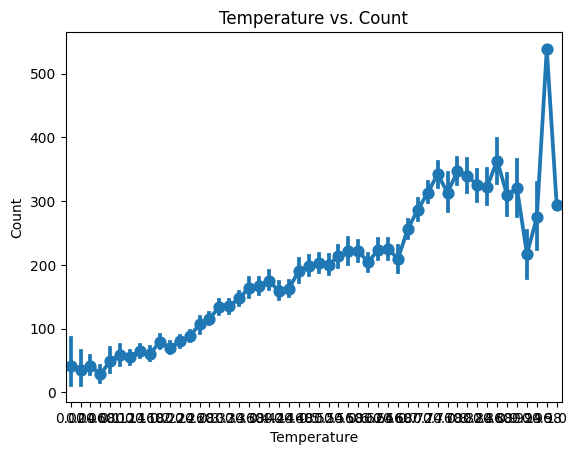

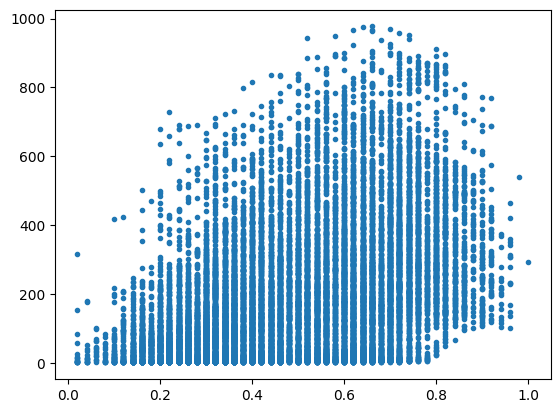

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.pointplot(x='temp',
              y='cnt',
              data=bikes)

plt.xlabel('Temperature')  # Setting the X-axis label
plt.ylabel('Count')  # Setting the Y-axis label
plt.title('Temperature vs. Count')  # Adding a title to the plot
plt.show()

## -- 
plt.figure()
plt.plot(bikes["temp"],
         bikes["cnt"],
         ".")
plt.show()